In [35]:
from methods import *
from pathlib import Path
from matplotlib.pyplot import style
style.use('seaborn')
import numpy as np
import nibabel as nib
import torchvision.transforms as T
import matplotlib.pyplot as plt
import cv2 as cv
import torch
import torch.nn as nn
import seaborn as sns

plt.rcParams["axes.grid"] = False
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['image.cmap'] = "gray"

In [36]:
data_path = (Path.cwd() / 'data' / 'Slice44-AllChannels.nii').as_posix()

In [37]:
img_nib = nib.load(data_path)

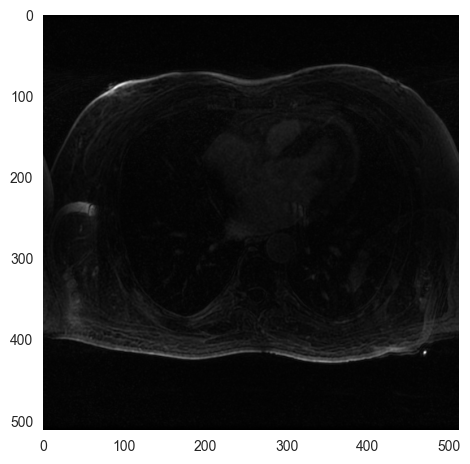

In [38]:
prev_img = combine_images(img_nib.dataobj)
prev_img = np.flip(prev_img, [0,1])
plt.imshow(prev_img)
plt.show()

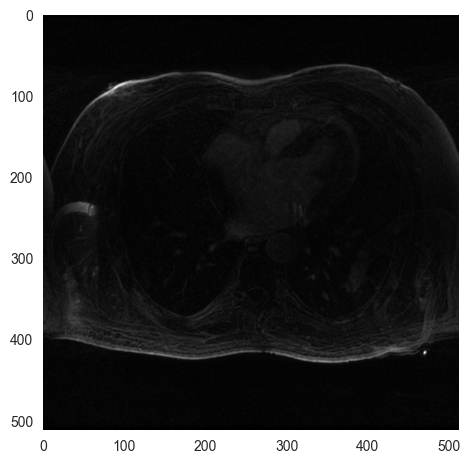

In [39]:
prev_img[prev_img < 50] = 0
plt.imshow(prev_img, cmap='gray')
plt.show()

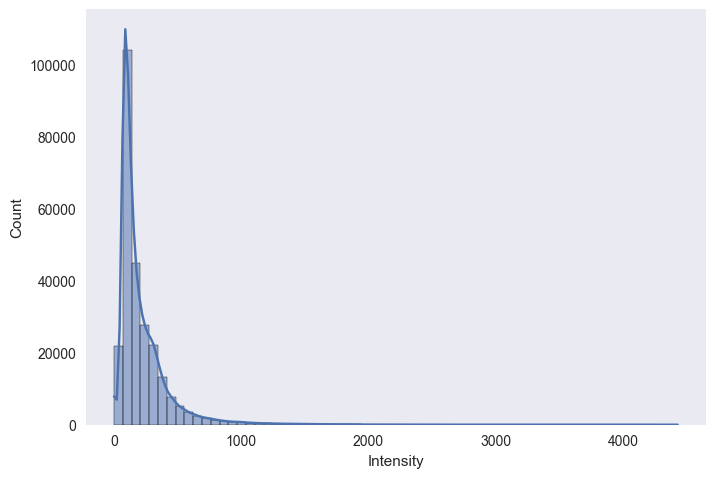

In [40]:
fig, ax = plt.subplots()
sns.histplot(prev_img.flatten(), bins=64, kde='True')
ax.set_xlabel("Intensity")
fig.savefig('output.png')
plt.show()

1132.8174666142695
1140.2268363846608


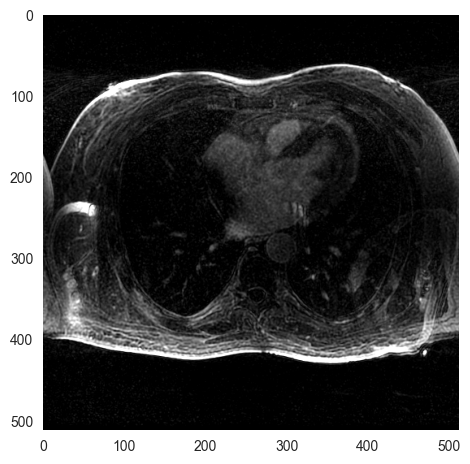

In [41]:
test = prev_img.copy()
print(np.quantile(test,0.99))
test = auto_contrast(test, 0.99)
plt.imshow(test)
plt.show()

<AxesSubplot:ylabel='Count'>

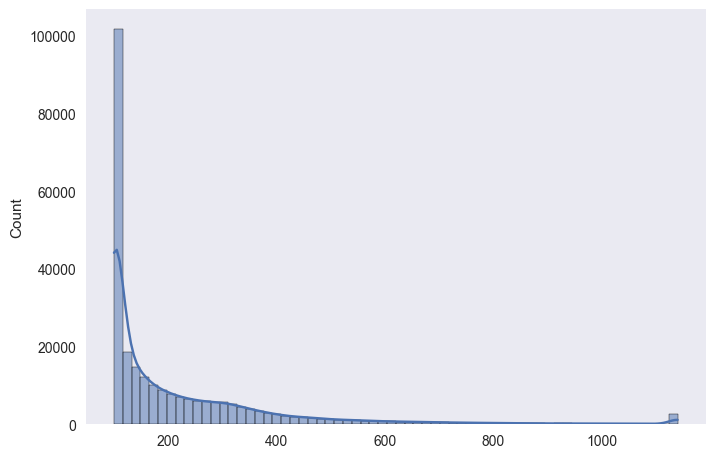

In [42]:
sns.histplot(test.flatten(), bins=64, kde='True')

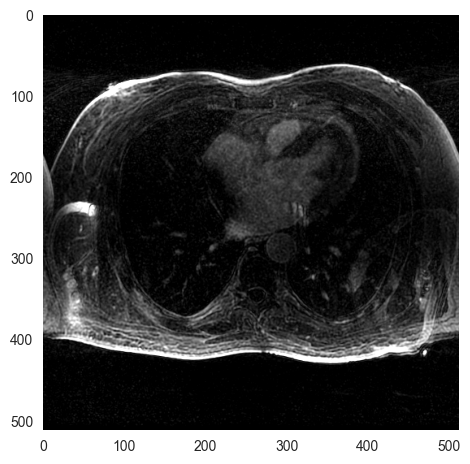

In [43]:
test2 = test.copy()
test2 = torch.from_numpy(test2)
test2 = test2.unsqueeze(0)
test2 = test2.unsqueeze(0)

test2 = T.Normalize(
    mean=test2.mean(),
    std=test2.std()
)(test2)

test2 = test2.squeeze()
test2 = test2.numpy()
plt.imshow(test2)
plt.show()

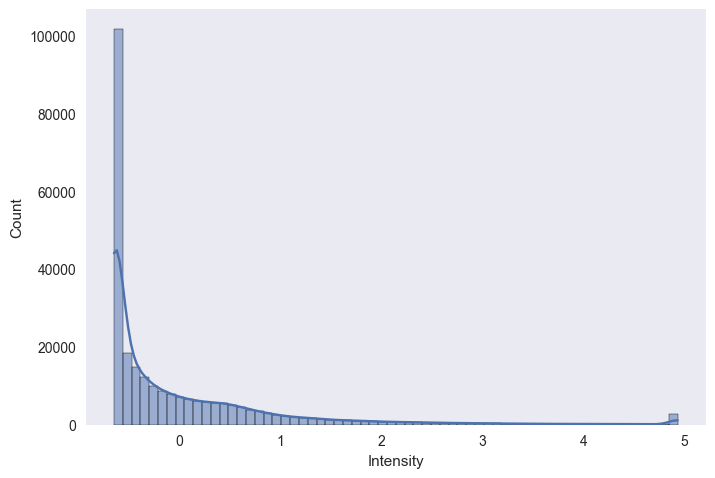

In [44]:
fig, ax = plt.subplots()
sns.histplot(test2.flatten(), bins=64, kde='True')
ax.set_xlabel("Intensity")
fig.savefig('output.png')
plt.show()

1140.2268363846608
932.1814691077286


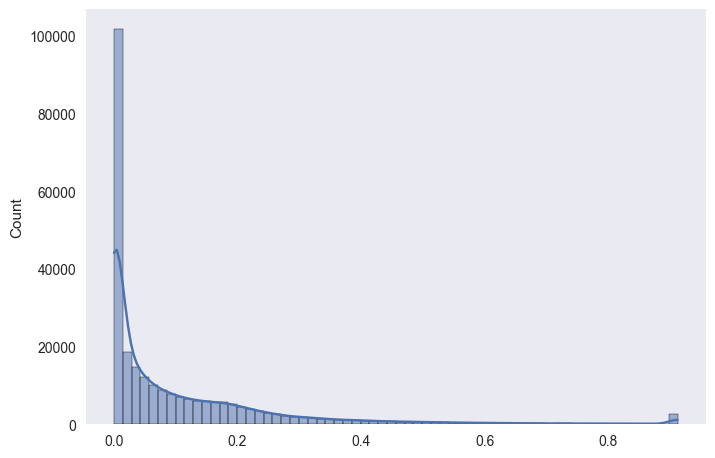

In [45]:
test3 = prev_img.copy()
test3 = auto_contrast(test3)
hist,bins = np.histogram(test3.flatten(), bins=10)
limit = np.quantile(bins, 0.8)
print(limit)
test3/=limit
test3 = (test3-test3.min())/test3.max()
sns.histplot(test3.flatten(), bins=64, kde=True)
plt.show()

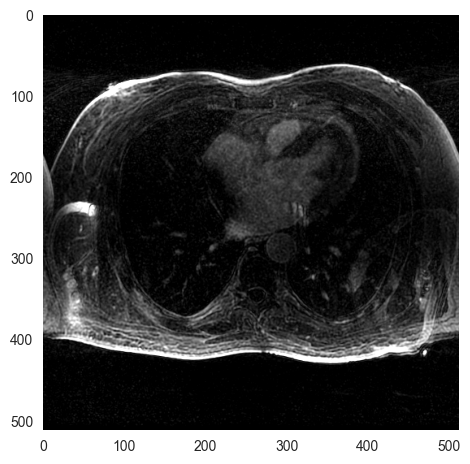

In [46]:
plt.imshow(test3, cmap='gray')
plt.show()

In [69]:
svhn = T.AutoAugment(T.AutoAugmentPolicy.SVHN)

test = test3.copy()
test = cv.normalize(
    test, None, 0, 255,
    cv.NORM_MINMAX, cv.CV_8U
)

og_img = torch.from_numpy(test)
og_img = og_img.unsqueeze(0)


test4 = [
    svhn(og_img) for _ in range(10)
]

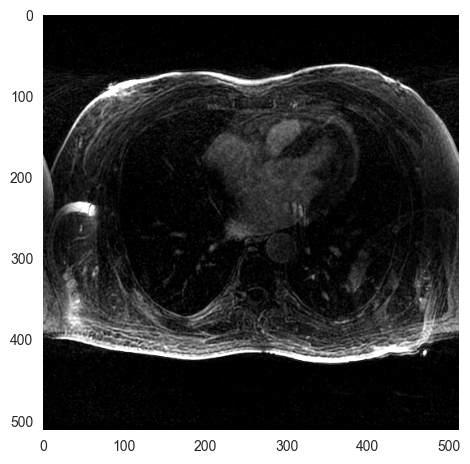

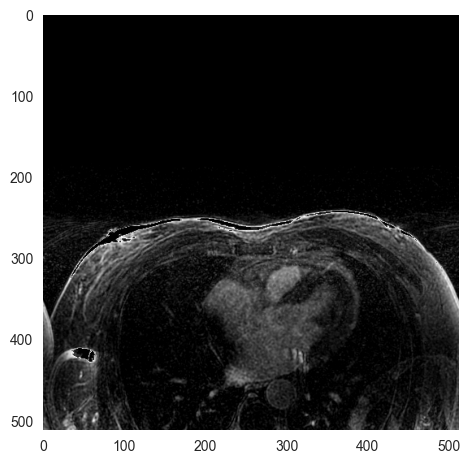

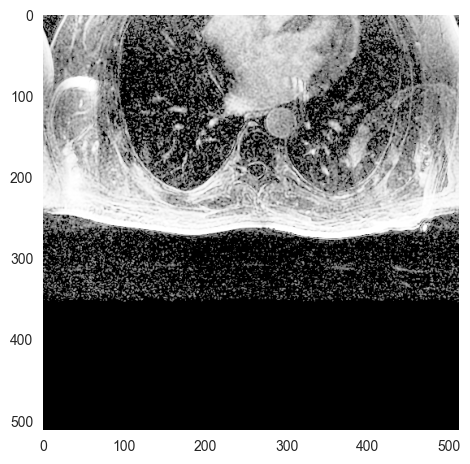

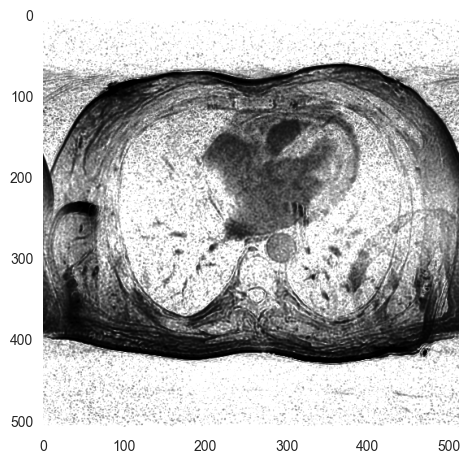

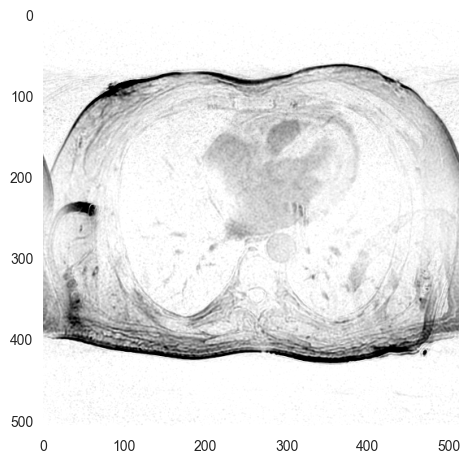

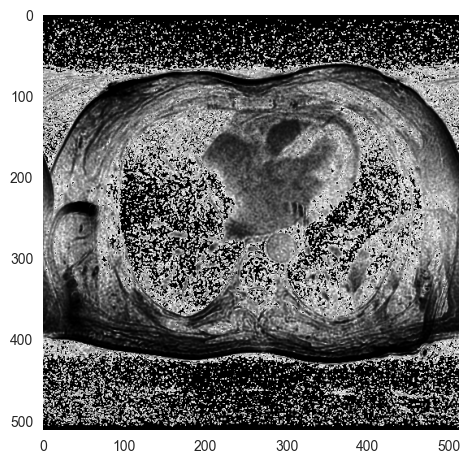

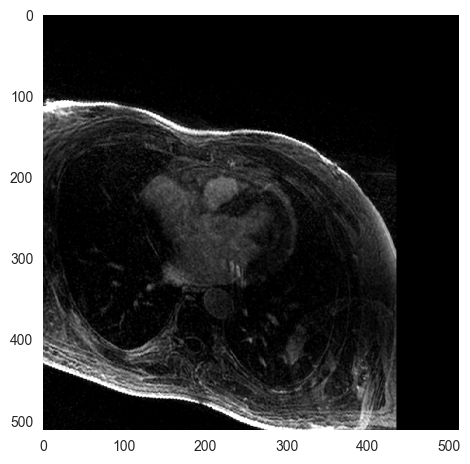

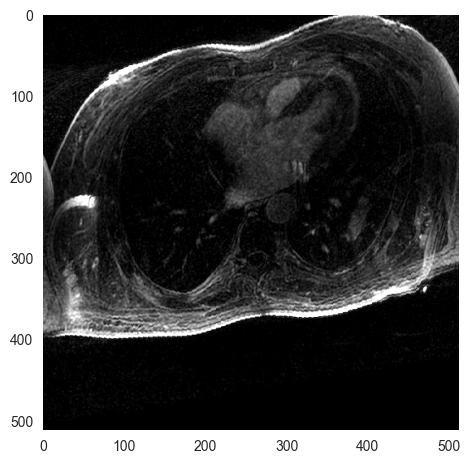

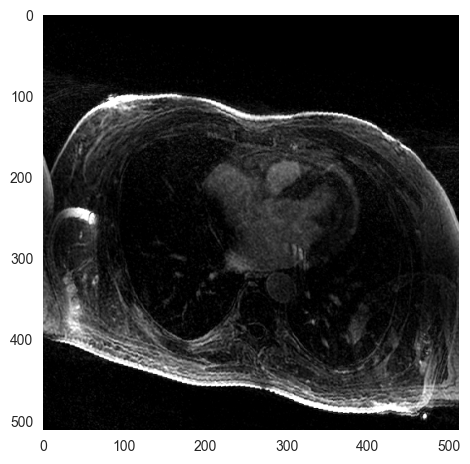

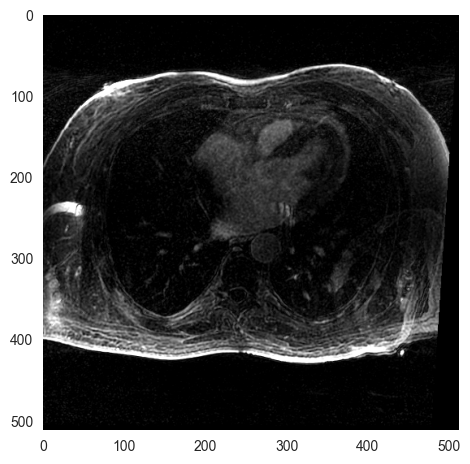

In [70]:
for img in test4:
    plt.imshow(img[0])
    plt.show()